## Project 3: Diagnostic Classification System
- 02 Exploratory Data Analysis

#### Content
> * [Background](#Background)
> * [Problem Statement](#Problem-Statement) 
> * [Web Scraping and Data Cleaning](#Web-Scraping-And-Data-Cleaning)
> * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
> * [Preprocessing and Modeling](#Preprocessing-And-Modeling)
> * [Baseline Model Performance Evaluation](#Baseline-Model-Performance-Evaluation)
> * [Evaluation and Conceptual Understanding](#Evaluation-And-Understanding)
> * [Conclusion and Recommendations](#Conclusion-And-Recommendations)

---
<a id='Background'></a>
### Background

Research has shown that gifted children can exhibit some of the same behaviours as those on the autism spectrum. Social quirkiness is normal in bright kids as well as in those with autism. Like kids on the spectrum, gifted kids also have keen memories and a good grip on language. They can also get lost in their imaginations or think logically and critically to the extent that imagination seems far away. Both groups can also find it difficult to manage social interactions with their peers. 

At the same time, these are broad generalisations of behaviours. Once you dive deeper, you can see there are some salient differences. For example, a gifted child may present an extensive and advanced vocabulary with a rich verbal style. A child on the autism spectrum may have an advanced use of vocabulary, but they may not have full comprehension of the language they use. They may also have a less inviting verbal style that lacks the engagement of others. By extension, these differences can cause students with aspergers to have learning styles and needs that deviate from those of gifted students. 

Studies have shown that it may be possible to distinguish children on the autism spectrum from gifted children by examining their use of language. This forms the basis of Project 3. This project will address convergent and divergent aspects in communication & language between individuals with aspergers and gifted individuals.

Citations: 
- Tai, J., & Goy, P. (2021). Study: 1 in 150 Children in Singapore Has Autism. The Straits Times.
- Chen, L., Abrams, D. A., Rosenberg-Lee, M., Iuculano, T., Wakeman, H. N., Prathap, S., Chen, T., & Menon, V. (2019). Quantitative analysis of heterogeneity in academic achievement of children with autism. Clinical psychological science : a journal of the Association for Psychological Science, 7(2), 362–380. 
- Lim, P. (2018). "Specific Language Impairment in Children with High-Functioning Autism Spectrum Disorder." Inquiries Journal, 10(05).
- Aggarwal, R., Ringold, S., Khanna, D., Neogi, T., Johnson, S. R., Miller, A., Brunner, H. I., Ogawa, R., Felson, D., Ogdie, A., Aletaha, D., & Feldman, B. M. (2015). Distinctions between diagnostic and classification criteria?. Arthritis care & research, 67(7), 891–897. 
- Minshew, N. J., Goldstein, G., & Siegel, D. J. (1995). Speech and language in high-functioning autistic individuals. Neuropsychology, 9(2), 255–261.

---
<a id='Problem-Statement'></a>
### Problem Statement

Context: The provision of healthcare in Singapore has become more challenging due to a couple of reasons.
1. Shifts in the nature of diseases highlights the system’s shortfall in managing complex chronic diseases
2. Evolution of healthcare consumer expectations
3. Manpower shortage in public hospitals to service the burgeoning aged population
4. Poor design of systems and operational inefficiencies lead to significant waste in Healthcare

Healthcare waste is incurred any time a patient, doctor, or healthcare worker engages in unnecessary medical activity - ranging from preventable mistakes in medical care, to misdiagnoses, provision of unnecessary treatments, and procedural inconsistencies. Research has shown that up to 20% of all healthcare resource expenditures are quality-associated waste and this can amount to a staggering sum. 

In Singapore, part of the costs (and risks) are borne by individuals and families, while part of the costs (and risks) are accounted for by the State - borne by taxpayers, and/or private health insurers. To eliminate waste, the Singapore government has come to incorporate technology into various care models to overcome the various cost- and quality-based challenges in the Healthcare sector. Most of these technologies are procured from private healthtech companies and start-ups. 

Citations: 
- Ooi, Low & Koh, Gerald & Tan, Lawrence & Yap, Jason & Chew, Samuel & Jih, Chin & Fung, Daniel & Sing, Lee & Lee, Patricia & Boon, Lim & Lim, Ruth & Low, James & Sachdev, Ravinder & Seah, Daren & Yeng, Siaw & Chiu, Tan & Teo, David & Tiwari, Satyaprakash & Tym, Wong & Scott, Richard. (2015). National Telemedicine Guidelines of Singapore.
- Nakhooda, F. (2021). The Bottom Line (Healthcare): Cutting Healthcare Waste: A Win-Win for Providers, Payers, Patients. The Business Times, Opinion & Features. 
- Khalik, S. (2018). Experts Highlight Prevalence and Cost of Waste in Healthcare Expenditure. The Straits Times. 

---
### Task
- What other diagnostic criteria can we extract using NLP-models to diagnose autistic and gifted children accurately?

You work in the Research and Development (R&D) of a healthtech startup in Singapore. The company has been enlisted by the Ministry of Health Holdings (MOHH) to create a simple diagnostic tool to rule out specific conditions and dieseases. After the development of a differential diagnosis, this tool will be a core feature in the series of additional tests that will conducted by healthcare professionals to rule out either autism or giftedness. Healthcare professionals will be able to come to a final diagnosis that is more accurate/precise, reducing the likelihood of misdiagnosis produced by the exisiting slew of subjective tests.

---
<a id='Exploratory-Data-Analysis'></a>
### Exploratory Data Analysis

Load Packages.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [114]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Import Data.

In [3]:
# import aspergers_df
aspergers_df = pd.read_csv('../data/aspergers_df.csv', low_memory=False)

In [4]:
len(aspergers_df)

953

In [5]:
# import gifted_df
gifted_df = pd.read_csv('../data/gifted_df.csv', low_memory=False) 

In [6]:
len(gifted_df)

962

Counts and Lengths: We’ll look at character counts, word counts, sentence counts, and string counts and also at the average word and sentence lengths.

In [8]:
aspergers_df.tail(10)

,text_feature,diagnosis
943,I'm not crazy I'm just trying to survive a cra...,1
944,"What's your BMI? ""Body mass index (BMI) is **a...",1
945,I always need to think and find the correct wo...,1
946,How can I support my niece (9F) who was diagno...,1
947,Help… I’ve been starving for days avoiding soc...,1
948,Finally accepting myself I’ve been in denial f...,1
949,Recommend a forum or somwhere to learn at leas...,1
950,Do you guys have high paying jobs?,1
951,Having aspergers feels like living life in spe...,1
952,How to appear more physically confident? Hello...,1


In [9]:
# character count
aspergers_df['char_count'] = aspergers_df['text_feature'].map(lambda x: len(x))

In [10]:
# word count
aspergers_df['word_count'] = aspergers_df['text_feature'].map(lambda x: len(x.split()))

In [11]:
# sentence count
aspergers_df['sen_count'] = aspergers_df['text_feature'].map(lambda x: len(nltk.sent_tokenize(x)))

In [12]:
# string count
aspergers_df['hashtag_count'] = aspergers_df['text_feature'].map(lambda x: x.count("#"))

In [13]:
# average word length
aspergers_df['avg_word_len'] = aspergers_df['text_feature'].map(lambda x: np.mean([len(w) for w in str(x).split()]))

In [14]:
# average sentence length
aspergers_df['avg_sen_len'] = aspergers_df['text_feature'].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

In [15]:
aspergers_df.head(3)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len
0,How's your week going so far? Weekly post #264...,1,558,83,5,1,5.710843,16.800000
1,Solitude Project Saturday: What projects are y...,1,620,89,6,1,5.966292,15.000000
2,I need to prepare both mentally and physically...,1,1198,243,13,0,3.921811,18.692308


In [16]:
gifted_df.tail(10)

,text_feature,diagnosis
952,Study of Chinese American Accelerated Learners...,0
953,Gifted across all domains Hi all - I wanted to...,0
954,I don't know anymore... quick background of my...,0
955,Do you get weird dreams that teach you things?...,0
956,Is it normal to feel as if my IQ test results ...,0
957,Has anyone else completely derailed their life...,0
958,Does anyone have the Gifted + Aspergers + ADHD...,0
959,Intense emotions I (22F) went to a therapist a...,0
960,Losing giftedness during teen years...? I am a...,0
961,"Have the option to opt out of gifted, but can'...",0


In [17]:
# character count
gifted_df['char_count'] = gifted_df['text_feature'].map(lambda x: len(x))

In [18]:
# word count
gifted_df['word_count'] = gifted_df['text_feature'].map(lambda x: len(x.split()))

In [19]:
# sentence count
gifted_df['sen_count'] = gifted_df['text_feature'].map(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
# string count
gifted_df['hashtag_count'] = gifted_df['text_feature'].map(lambda x: x.count("#"))

In [21]:
# average word length
gifted_df['avg_word_len'] = gifted_df['text_feature'].map(lambda x: np.mean([len(w) for w in str(x).split()]))

In [22]:
# average sentence length
gifted_df['avg_sen_len'] = gifted_df['text_feature'].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

In [23]:
gifted_df.head(3)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len
0,Does your brain automatically synthesize infor...,0,1254,204,11,0,5.142157,18.545455
1,"Parents, what were the early signs that made y...",0,1190,218,13,0,4.417431,16.769231
2,Gifted folks who struggled and then succeeded ...,0,1502,255,18,0,4.847059,14.166667


Concatenate the data into one single dataframe for exploratory data analysis.

In [24]:
# concatenate the data into one single dataframe along rows
eda_df = pd.concat([aspergers_df, gifted_df], axis=0)

In [25]:
eda_df.diagnosis.value_counts()

0    962
1    953
Name: diagnosis, dtype: int64

In [26]:
eda_df.columns

Index(['text_feature', 'diagnosis', 'char_count', 'word_count', 'sen_count',
       'hashtag_count', 'avg_word_len', 'avg_sen_len'],
      dtype='object')

In [27]:
# reset the index after appending the dataframes together by rows
eda_df.reset_index(inplace=True, drop=True)

In [28]:
eda_df.tail(3)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len
1912,Intense emotions I (22F) went to a therapist a...,0,1912,355,26,0,4.363380,13.653846
1913,Losing giftedness during teen years...? I am a...,0,2416,441,29,4,4.444444,15.241379
1914,"Have the option to opt out of gifted, but can'...",0,669,129,9,0,4.186047,14.333333


Explore new features with Histogram, KDE plots, or Boxplots.

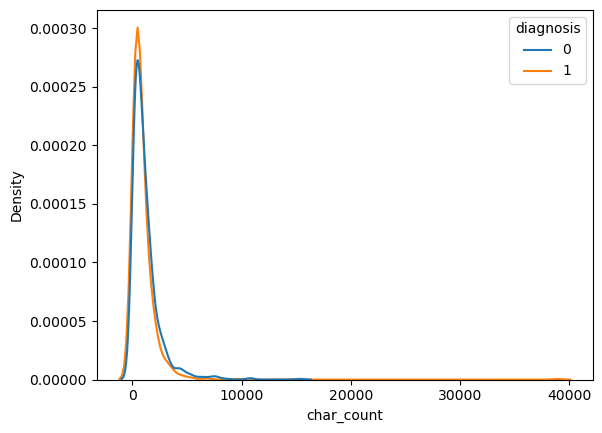

In [29]:
# KDE plot for character count
sns.kdeplot(data=eda_df, x=eda_df.char_count, hue=eda_df.diagnosis);

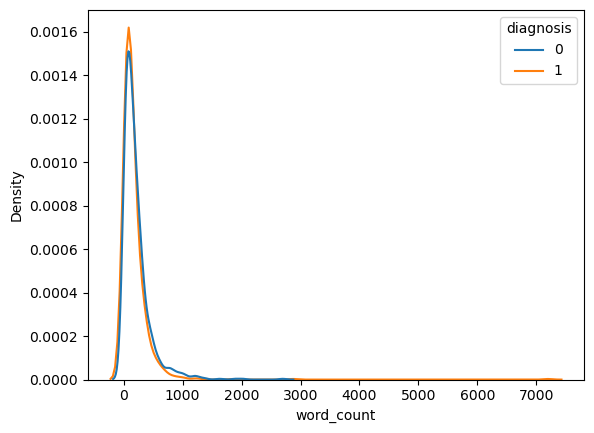

In [30]:
# KDE plot for word count
sns.kdeplot(data=eda_df, x=eda_df.word_count, hue=eda_df.diagnosis);

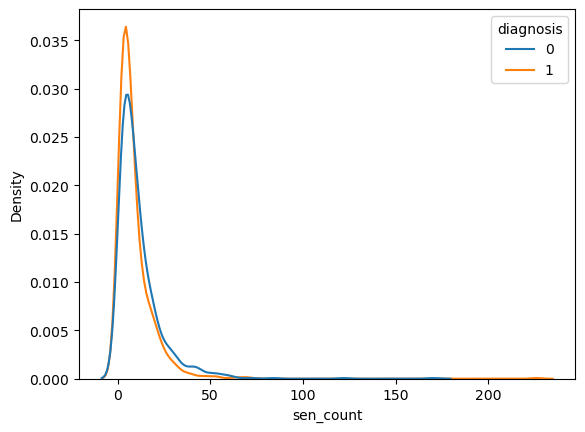

In [31]:
# KDE plot for sentence count
sns.kdeplot(data=eda_df, x=eda_df.sen_count, hue=eda_df.diagnosis);

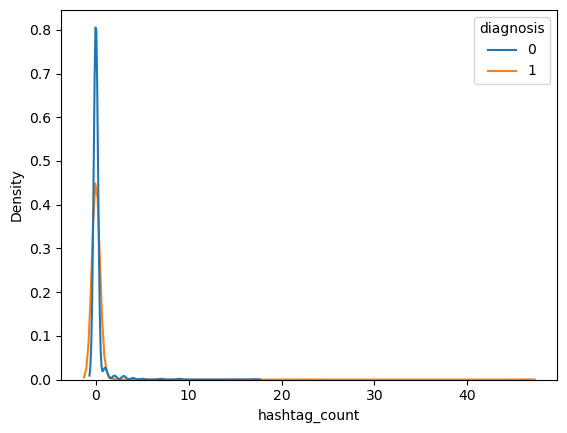

In [32]:
# KDE plot for hashtag count
sns.kdeplot(data=eda_df, x=eda_df.hashtag_count, hue=eda_df.diagnosis);

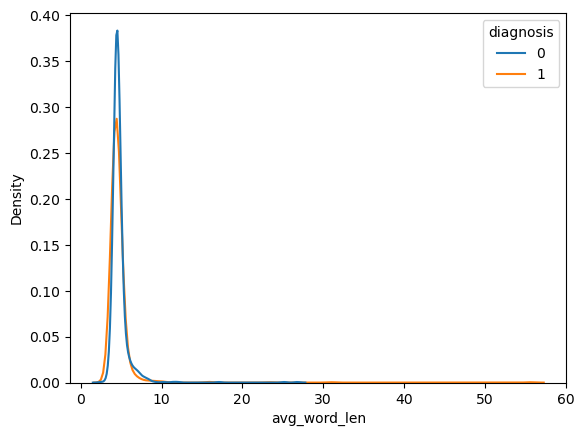

In [33]:
# KDE plot for average word length
sns.kdeplot(data=eda_df, x=eda_df.avg_word_len, hue=eda_df.diagnosis);

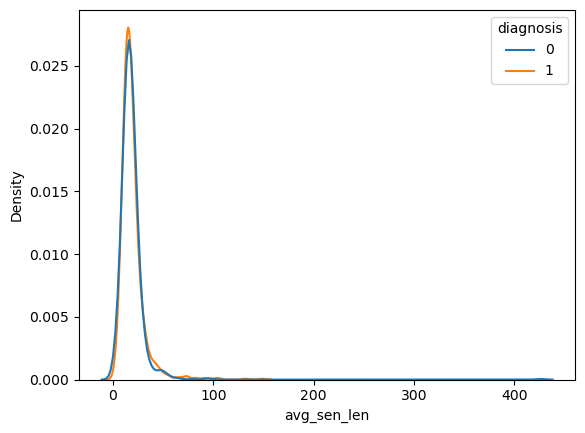

In [34]:
# KDE plot for average sentence length
sns.kdeplot(data=eda_df, x=eda_df.avg_sen_len, hue=eda_df.diagnosis);

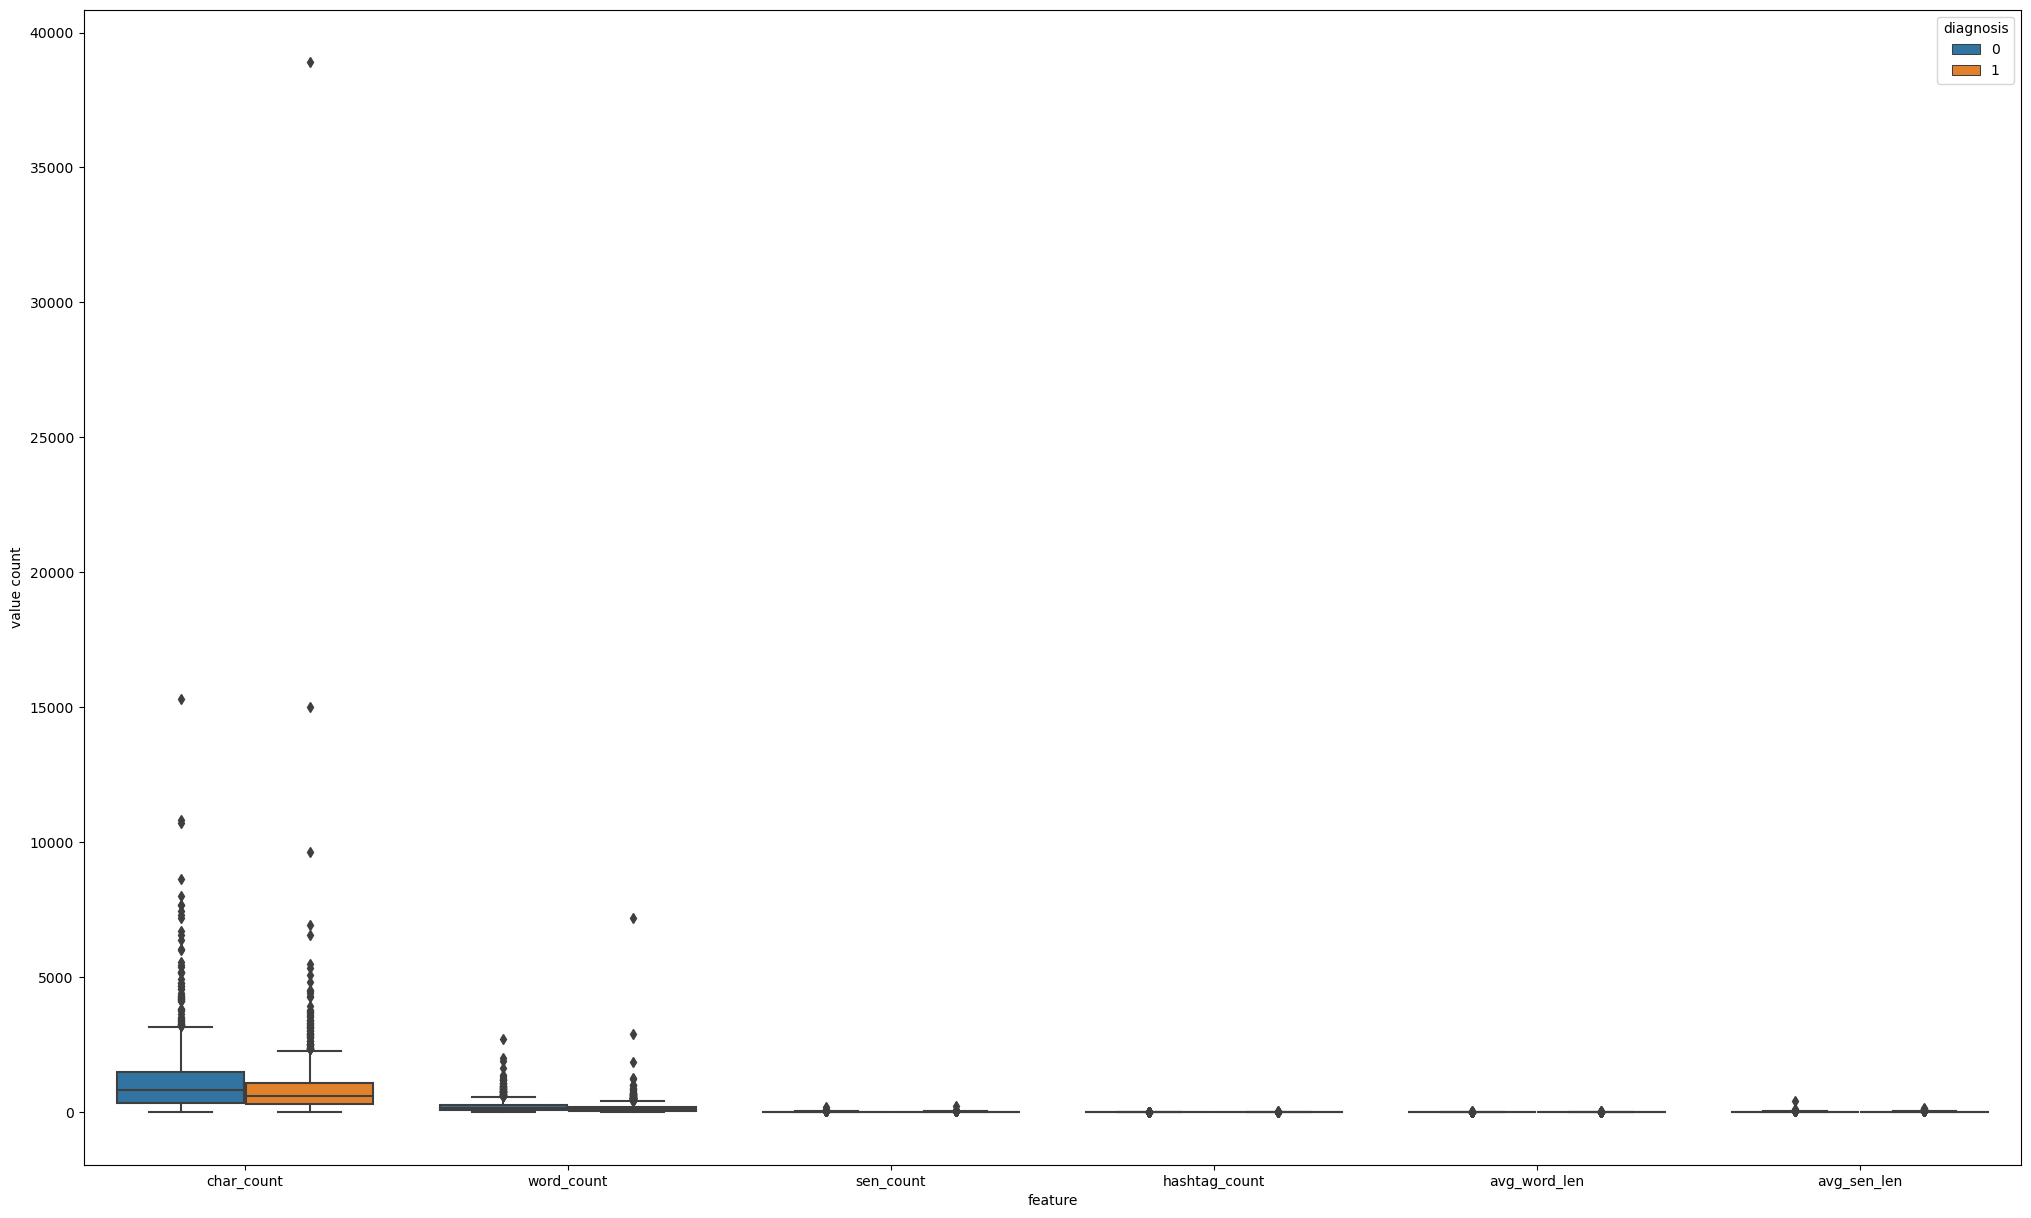

In [35]:
# boxplot for character count
fig, ax = plt.subplots(figsize=(25, 15))
sns.boxplot(data=eda_df.melt(id_vars=['diagnosis'], 
                             value_vars=['char_count', 'word_count', 'sen_count', 'hashtag_count', 'avg_word_len', 'avg_sen_len'], 
                             var_name='feature',
                             value_name='value count'), 
            x='feature', 
            y='value count', 
            hue='diagnosis');

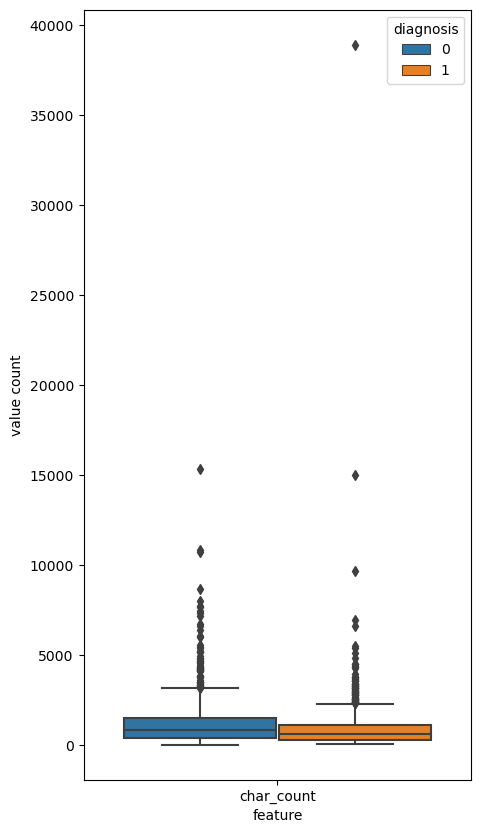

In [36]:
# boxplot for character count
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=eda_df.melt(id_vars=['diagnosis'], 
                             value_vars=['char_count'], 
                             var_name='feature',
                             value_name='value count'), 
            x='feature', 
            y='value count', 
            hue='diagnosis');

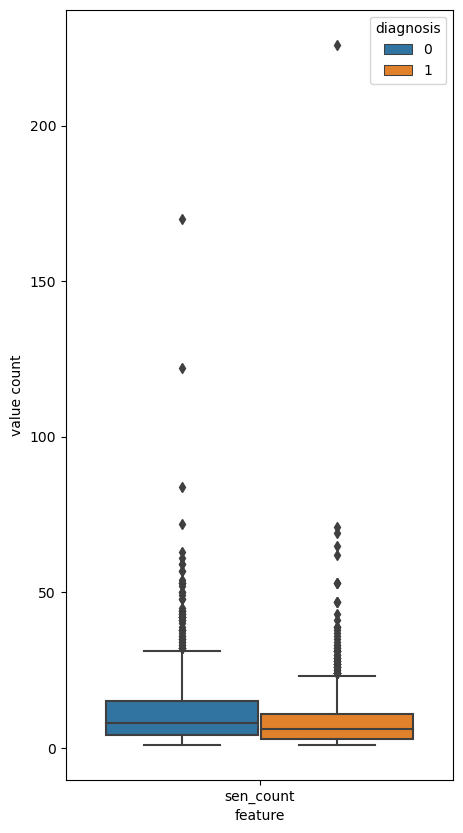

In [37]:
# boxplot for sentence count
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=eda_df.melt(id_vars=['diagnosis'], 
                             value_vars=['sen_count'], 
                             var_name='feature',
                             value_name='value count'), 
            x='feature', 
            y='value count', 
            hue='diagnosis');

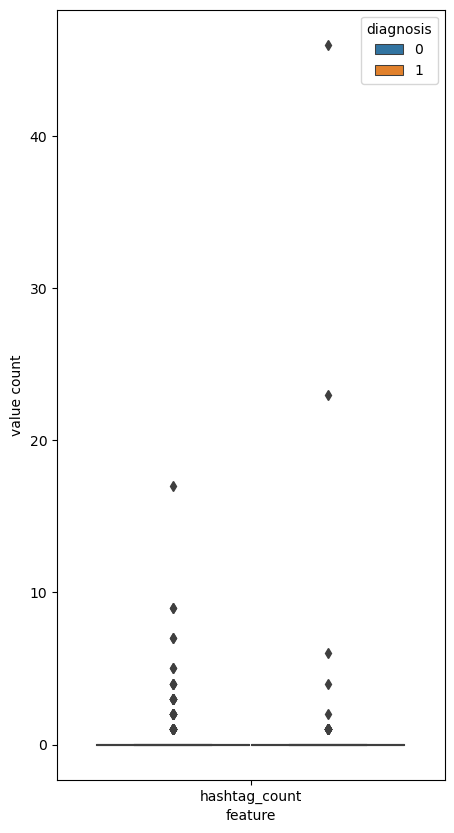

In [38]:
# boxplot for hashtag count
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=eda_df.melt(id_vars=['diagnosis'], 
                             value_vars=['hashtag_count'], 
                             var_name='feature',
                             value_name='value count'), 
            x='feature', 
            y='value count', 
            hue='diagnosis');

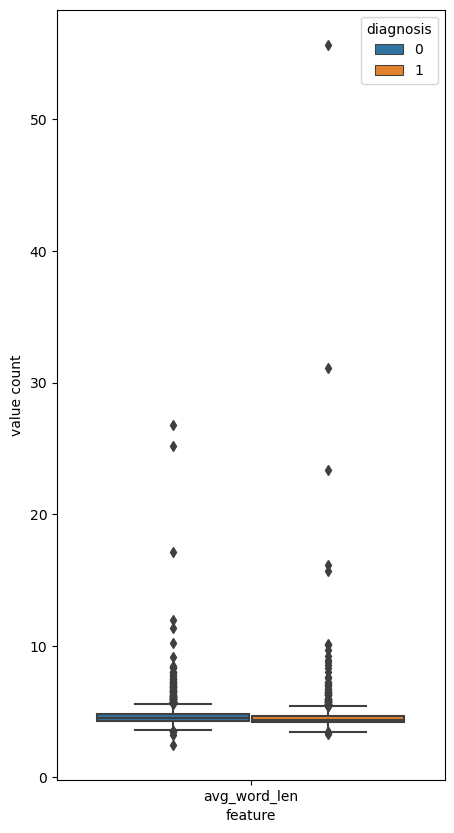

In [39]:
# boxplot for average word length
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=eda_df.melt(id_vars=['diagnosis'], 
                             value_vars=['avg_word_len'], 
                             var_name='feature',
                             value_name='value count'), 
            x='feature', 
            y='value count', 
            hue='diagnosis');

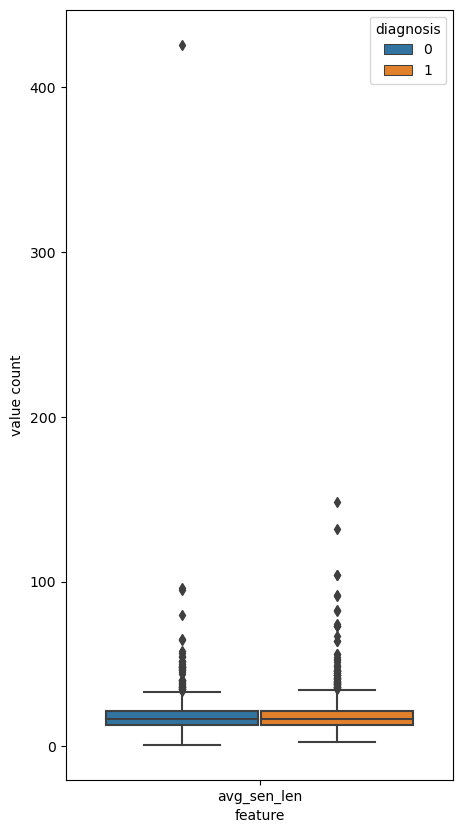

In [40]:
# boxplot for average sentence length
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=eda_df.melt(id_vars=['diagnosis'], 
                             value_vars=['avg_sen_len'], 
                             var_name='feature',
                             value_name='value count'), 
            x='feature', 
            y='value count', 
            hue='diagnosis');

Term Frequency Analysis - look at the most frequent words and n-grams.

In [41]:
# preprocess the text by changing everything to lowercase
# remove punctuation
# remove non-roman characters
# remove new lines 
import re
import string
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    # remove new lines from the text
    text = text.replace('\n', '')
    
    return text
aspergers_df["text_clean"] = aspergers_df["text_feature"].map(lambda x: clean_text(x))

In [42]:
aspergers_df.tail(10)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len,text_clean
943,I'm not crazy I'm just trying to survive a cra...,1,54,11,1,0,4.000000,11.000000,im not crazy im just trying to survive a crazy...
944,"What's your BMI? ""Body mass index (BMI) is **a...",1,298,29,3,0,9.241379,9.666667,whats your bmi body mass index bmi is a person...
945,I always need to think and find the correct wo...,1,968,174,12,0,4.517241,14.500000,i always need to think and find the correct wo...
946,How can I support my niece (9F) who was diagno...,1,628,109,10,0,4.743119,10.900000,how can i support my niece 9f who was diagnose...
947,Help… I’ve been starving for days avoiding soc...,1,492,94,5,0,4.202128,18.800000,help i ve been starving for days avoiding soc...
948,Finally accepting myself I’ve been in denial f...,1,412,79,3,0,4.215190,26.333333,finally accepting myself i ve been in denial f...
949,Recommend a forum or somwhere to learn at leas...,1,200,40,2,0,4.025000,20.000000,recommend a forum or somwhere to learn at leas...
950,Do you guys have high paying jobs?,1,35,7,1,0,4.000000,7.000000,do you guys have high paying jobs
951,Having aspergers feels like living life in spe...,1,353,62,5,0,4.709677,12.400000,having aspergers feels like living life in spe...
952,How to appear more physically confident? Hello...,1,816,146,12,0,4.575342,12.166667,how to appear more physically confident hellot...


In [43]:
# preprocess the text by changing everything to lowercase
# remove punctuation
# remove non-roman characters
# remove new lines 
import re
import string
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    # remove new lines from the text
    text = text.replace('\n', '')
    
    return text
gifted_df["text_clean"] = gifted_df["text_feature"].map(lambda x: clean_text(x))

In [44]:
gifted_df.tail(10)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len,text_clean
952,Study of Chinese American Accelerated Learners...,0,432,62,3,0,5.983871,20.666667,study of chinese american accelerated learners...
953,Gifted across all domains Hi all - I wanted to...,0,501,90,5,0,4.555556,18.000000,gifted across all domains hi all i wanted to ...
954,I don't know anymore... quick background of my...,0,1476,164,8,3,7.920732,20.500000,i dont know anymore quick background of myself...
955,Do you get weird dreams that teach you things?...,0,2826,541,48,0,4.197782,11.270833,do you get weird dreams that teach you things ...
956,Is it normal to feel as if my IQ test results ...,0,458,97,6,0,3.670103,16.166667,is it normal to feel as if my iq test results ...
957,Has anyone else completely derailed their life...,0,3247,601,30,0,4.397671,20.033333,has anyone else completely derailed their life...
958,Does anyone have the Gifted + Aspergers + ADHD...,0,111,23,2,0,3.869565,11.500000,does anyone have the gifted aspergers adhd c...
959,Intense emotions I (22F) went to a therapist a...,0,1912,355,26,0,4.363380,13.653846,intense emotions i 22f went to a therapist a w...
960,Losing giftedness during teen years...? I am a...,0,2416,441,29,4,4.444444,15.241379,losing giftedness during teen years i am a 14 ...
961,"Have the option to opt out of gifted, but can'...",0,669,129,9,0,4.186047,14.333333,have the option to opt out of gifted but cant ...


Remove stopwords from corpus of cleaned text.

In [45]:
# call up list of stopwords
stop_words = set(stopwords.words("english"))

In [46]:
# create a new column name corpus
aspergers_df['corpus'] = ' '

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
aspergers_df['corpus'] = aspergers_df['text_clean'].apply(lambda x: [word for word in x.split() if word not in (stop_words)])

In [47]:
# create a new column name corpus
gifted_df['corpus'] = ' '

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
gifted_df['corpus'] = gifted_df['text_clean'].apply(lambda x: [word for word in x.split() if word not in (stop_words)])

In [48]:
aspergers_df.head(10)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len,text_clean,corpus
0,How's your week going so far? Weekly post #264...,1,558,83,5,1,5.710843,16.800000,hows your week going so far weekly post 264 he...,"[hows, week, going, far, weekly, post, 264, he..."
1,Solitude Project Saturday: What projects are y...,1,620,89,6,1,5.966292,15.000000,solitude project saturday what projects are yo...,"[solitude, project, saturday, projects, workin..."
2,I need to prepare both mentally and physically...,1,1198,243,13,0,3.921811,18.692308,i need to prepare both mentally and physically...,"[need, prepare, mentally, physically, long, ti..."
3,I hate TikTok Autism clout-chasers All these...,1,945,169,6,0,4.585799,28.166667,i hate tiktok autism cloutchasers all these ...,"[hate, tiktok, autism, cloutchasers, people, t..."
4,Anyone have trouble sleeping because of a hype...,1,1165,209,17,0,4.559809,12.294118,anyone have trouble sleeping because of a hype...,"[anyone, trouble, sleeping, hyper, active, bra..."
5,"How would you feel if someone told you, regard...",1,283,49,3,0,4.775510,16.333333,how would you feel if someone told you regardi...,"[would, feel, someone, told, regarding, specia..."
6,Autism is a curse and I hate having something ...,1,38905,7201,226,0,4.397584,31.862832,autism is a curse and i hate having something ...,"[autism, curse, hate, something, ruined, life,..."
7,Why are ADHD and autism often bundled together...,1,660,108,7,0,5.111111,15.428571,why are adhd and autism often bundled together...,"[adhd, autism, often, bundled, together, exclu..."
8,Aspergers and Porn Hi There\n\nI genuinely don...,1,945,178,5,0,4.286517,35.600000,aspergers and porn hi therei genuinely dont kn...,"[aspergers, porn, hi, therei, genuinely, dont,..."
9,How many jobs have we had? I’m 29(m) and sitti...,1,2178,401,24,0,4.396509,16.708333,how many jobs have we had i m 29m and sitting ...,"[many, jobs, 29m, sitting, 44, jobs, ranging, ..."


In [49]:
gifted_df.head(10)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len,text_clean,corpus
0,Does your brain automatically synthesize infor...,0,1254,204,11,0,5.142157,18.545455,does your brain automatically synthesize infor...,"[brain, automatically, synthesize, information..."
1,"Parents, what were the early signs that made y...",0,1190,218,13,0,4.417431,16.769231,parents what were the early signs that made yo...,"[parents, early, signs, made, think, child, gi..."
2,Gifted folks who struggled and then succeeded ...,0,1502,255,18,0,4.847059,14.166667,gifted folks who struggled and then succeeded ...,"[gifted, folks, struggled, succeeded, career, ..."
3,What do you guys think about the sub r/iamvery...,0,733,95,4,0,6.726316,23.750000,what do you guys think about the sub riamverys...,"[guys, think, sub, riamverysmart, recently, ca..."
4,Programs similar to Beast Academy for Sciences...,0,585,97,7,0,5.000000,13.857143,programs similar to beast academy for sciences...,"[programs, similar, beast, academy, sciencesla..."
5,"Loneliness Hello, I have been on the internet ...",0,10703,1891,40,0,4.652565,47.275000,loneliness hello i have been on the internet f...,"[loneliness, hello, internet, almost, ten, yea..."
6,How to find folks to work on project together ...,0,519,91,5,1,4.582418,18.200000,how to find folks to work on project together ...,"[find, folks, work, project, together, hix200b..."
7,One of the simplest way to stay happy is to le...,0,89,20,1,0,3.450000,20.000000,one of the simplest way to stay happy is to le...,"[one, simplest, way, stay, happy, let, go, thi..."
8,As scientific methodologies take over the doma...,0,239,32,1,0,6.468750,32.000000,as scientific methodologies take over the doma...,"[scientific, methodologies, take, domain, phil..."
9,"Dear Gifted Children, You DO NOT Owe the World...",0,731,144,7,0,4.076389,20.571429,dear gifted children you do not owe the world ...,"[dear, gifted, children, owe, world, anything,..."


In [50]:
# create an asperger's corpus of words
corpus_aspergers = [] 

In [51]:
for i in range(len(aspergers_df)):
    corpus_aspergers += aspergers_df.corpus[i]

In [52]:
corpus_aspergers

['hows',
 'week',
 'going',
 'far',
 'weekly',
 'post',
 '264',
 'heres',
 'last',
 'weeks',
 'threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions',
 'always',
 'welcome',
 'improve',
 'threads',
 'post',
 'time',
 'community',
 'wants',
 'threads',
 'exist',
 'take',
 'time',
 'day',
 'every',
 'thursday',
 'saturday',
 'post',
 'weekly',
 'threads',
 'ensure',
 'community',
 'gets',
 'feels',
 'needsso',
 'continuing',
 'theme',
 'raspergers',
 'week',
 'going',
 'far',
 'solitude',
 'project',
 'saturday',
 'projects',
 'working',
 'pertain',
 'special',
 'interests',
 'weekly',
 'post',
 '264',
 'heres',
 'last',
 'weeks',
 'solitude',
 'project',
 'saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso',
 'raspergers',
 'projects',
 'go',
 'right',
 'ideas',
 'backburner',
 'one',
 'reason',
 'another',
 'ideas',
 'planning',
 'phase',
 'even',
 'working',
 'someone',
 'else',
 'still',
 'apply',
 'm

In [53]:
len(corpus_aspergers)

76932

In [54]:
# create a gifted corpus of words
corpus_gifted = []

In [55]:
for i in range(len(gifted_df)):
    corpus_gifted += gifted_df.corpus[i]

In [56]:
corpus_gifted

['brain',
 'automatically',
 'synthesize',
 'information',
 'rather',
 'remember',
 'details',
 'observe',
 'regular',
 'people',
 'interact',
 'tend',
 'share',
 'life',
 'experiences',
 'storytelling',
 'say',
 'stuff',
 'like',
 'day',
 'walking',
 'grocery',
 'store',
 'blablabla',
 'bunch',
 'said',
 'said',
 'throughout',
 'addition',
 'commentary',
 'felt',
 'essentially',
 'stay',
 'descriptive',
 'level',
 'seems',
 'geared',
 'towards',
 'social',
 'bondingwhen',
 'think',
 'bulk',
 'interactions',
 'tend',
 'explanatory',
 'argumentative',
 'level',
 'means',
 'instead',
 'describing',
 'every',
 'single',
 'detail',
 'brain',
 'tends',
 'synthesize',
 'whole',
 'experience',
 'short',
 'summary',
 'went',
 'grocery',
 'store',
 'nothing',
 'ordinary',
 'got',
 'everything',
 'need',
 'next',
 '3',
 'days',
 'similarly',
 'reading',
 'books',
 'brain',
 'skips',
 'anything',
 'normal',
 'predictable',
 'focuses',
 'parts',
 'surprise',
 'meotherwise',
 'rest',
 'interactions

In [57]:
len(corpus_gifted)

97820

Shorten words so we can combine similar forms of the same word.

In [59]:
# instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [60]:
# lemmatize tokens in corpus_aspergers
lem_aspergers = [lemmatizer.lemmatize(i) for i in corpus_aspergers]

In [61]:
# print lemmatized tokens that are different
[(corpus_aspergers[i], lem_aspergers[i]) for i in range(len(corpus_aspergers)) if corpus_aspergers[i] != lem_aspergers[i]]

[('heres', 'here'),
 ('weeks', 'week'),
 ('threads', 'thread'),
 ('wants', 'want'),
 ('threads', 'thread'),
 ('threads', 'thread'),
 ('gets', 'get'),
 ('feels', 'feel'),
 ('projects', 'project'),
 ('interests', 'interest'),
 ('heres', 'here'),
 ('weeks', 'week'),
 ('projects', 'project'),
 ('ideas', 'idea'),
 ('ideas', 'idea'),
 ('friends', 'friend'),
 ('days', 'day'),
 ('friends', 'friend'),
 ('visits', 'visit'),
 ('times', 'time'),
 ('parents', 'parent'),
 ('children', 'child'),
 ('media', 'medium'),
 ('sites', 'site'),
 ('us', 'u'),
 ('symptoms', 'symptom'),
 ('parents', 'parent'),
 ('things', 'thing'),
 ('things', 'thing'),
 ('helps', 'help'),
 ('times', 'time'),
 ('hours', 'hour'),
 ('stops', 'stop'),
 ('thoughts', 'thought'),
 ('specialists', 'specialist'),
 ('experiences', 'experience'),
 ('comments', 'comment'),
 ('nts', 'nt'),
 ('kids', 'kid'),
 ('skills', 'skill'),
 ('adults', 'adult'),
 ('sucks', 'suck'),
 ('gatherings', 'gathering'),
 ('affects', 'affect'),
 ('meetings', 'm

In [62]:
# lemmatize tokens in corpus_gifted
lem_gifted = [lemmatizer.lemmatize(i) for i in corpus_gifted]

In [63]:
# print lemmatized tokens that are different
[(corpus_gifted[i], lem_gifted[i]) for i in range(len(corpus_gifted)) if corpus_gifted[i] != lem_gifted[i]]

[('details', 'detail'),
 ('experiences', 'experience'),
 ('interactions', 'interaction'),
 ('means', 'mean'),
 ('days', 'day'),
 ('books', 'book'),
 ('skips', 'skip'),
 ('focuses', 'focus'),
 ('parts', 'part'),
 ('interactions', 'interaction'),
 ('arguments', 'argument'),
 ('explanations', 'explanation'),
 ('stories', 'story'),
 ('anecdotes', 'anecdote'),
 ('parents', 'parent'),
 ('signs', 'sign'),
 ('years', 'year'),
 ('months', 'month'),
 ('words', 'word'),
 ('knows', 'know'),
 ('words', 'word'),
 ('months', 'month'),
 ('words', 'word'),
 ('songs', 'song'),
 ('months', 'month'),
 ('letters', 'letter'),
 ('numbers', 'number'),
 ('months', 'month'),
 ('months', 'month'),
 ('shapes', 'shape'),
 ('ones', 'one'),
 ('months', 'month'),
 ('us', 'u'),
 ('experiences', 'experience'),
 ('signs', 'sign'),
 ('folks', 'folk'),
 ('lessons', 'lesson'),
 ('achievers', 'achiever'),
 ('notes', 'note'),
 ('classmates', 'classmate'),
 ('classmates', 'classmate'),
 ('grades', 'grade'),
 ('professors', 'p

In [65]:
# frequency plot for aspergers_df
# alternatively, you can use counter
# most_common_asp = Counter(lem_aspergers).most_common(25)
most_common_asp = FreqDist(lem_aspergers).most_common(25)

In [66]:
most_common_asp

[('like', 1221),
 ('people', 977),
 ('im', 800),
 ('feel', 748),
 ('know', 622),
 ('time', 596),
 ('get', 576),
 ('dont', 557),
 ('even', 532),
 ('thing', 517),
 ('want', 432),
 ('would', 425),
 ('really', 416),
 ('life', 404),
 ('one', 403),
 ('think', 401),
 ('make', 388),
 ('friend', 364),
 ('something', 353),
 ('way', 326),
 ('anyone', 315),
 ('also', 315),
 ('work', 302),
 ('much', 297),
 ('go', 289)]

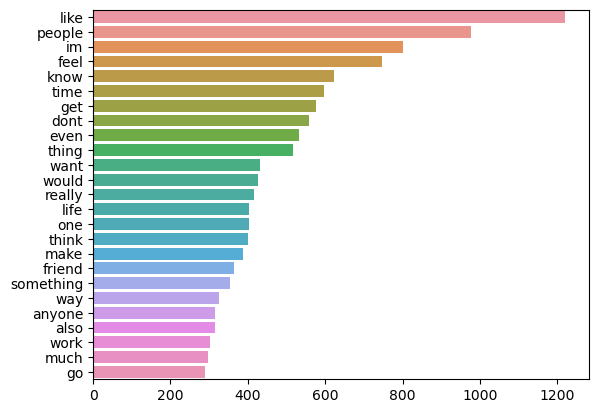

In [67]:
words, frequency = [], []
for word, count in most_common_asp:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words); 

In [68]:
# frequency plot for gifted_df
# alternatively, you can use counter
# most_common_gifted = Counter(lem_gifted).most_common(25)
most_common_gifted = FreqDist(lem_gifted).most_common(25)

In [69]:
most_common_gifted

[('gifted', 1234),
 ('like', 1170),
 ('people', 1063),
 ('im', 915),
 ('feel', 745),
 ('know', 650),
 ('thing', 648),
 ('school', 598),
 ('would', 577),
 ('time', 575),
 ('get', 573),
 ('dont', 557),
 ('year', 535),
 ('one', 529),
 ('also', 511),
 ('think', 503),
 ('really', 453),
 ('life', 451),
 ('make', 420),
 ('even', 410),
 ('much', 403),
 ('want', 402),
 ('way', 379),
 ('giftedness', 361),
 ('ive', 354)]

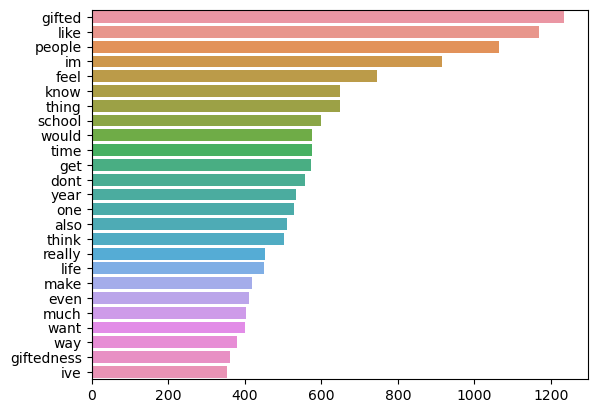

In [70]:
words, frequency = [], []
for word, count in most_common_gifted:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words);

Comments:
1. From this technique, we can see that in both aspergers and gifted communitites, subjects like “feel”, "think”, "time", "life", and "people" are most commonly mentioned. 
2. While individuals in the aspergers community spoke about "work" and "friends", individuals in the gifted community tended to speak about "school" and "gifted/giftedness". 
3. From this technique, we see that in both aspergers and gifted communities, individuals spoke in first person "i'm" and "i've". 
4. Individuals in the aspergers community used words such as "anyone" and "else" commonly, indicative of their desire to find other like-minded individuals. On ther other hand, individuals in the gifted community do not seem to have have the same concern. Instead, they use the absolute term "always" commonly. Absolutist thinking, or thinking in terms of totality / 'all-or-nothing' mentality is communicated through terms as such. 


Create function to extract most frequent N-grams from `text_clean`.

In [71]:
def get_ngram_freq(n, df):
    # Initialize CountVectorizer
    vec = CountVectorizer(stop_words = stop_words, 
                          ngram_range = (n, n))

    # Matrix of ngrams
    bow = vec.fit_transform(df["text_clean"])

    # Count frequency of ngrams
    count_values = bow.toarray().sum(axis=0)

    # Create DataFrame from ngram frequencies
    ngram_freq = pd.DataFrame([(count_values[i], k) for k, i in vec.vocabulary_.items()])
    ngram_freq.columns = ["frequency", "ngram"]
    ngram_freq.sort_values(by = "frequency",  ascending = False, inplace = True)

    return ngram_freq

Most frequent bi-grams by "diagnosis" class.

In [72]:
bigram_asp_df = get_ngram_freq(2, aspergers_df).head(25)

In [73]:
bigram_asp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 166 to 5545
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   frequency  25 non-null     int64 
 1   ngram      25 non-null     object
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


In [74]:
# drop index column
bigram_asp_df.reset_index(inplace=True)
bigram_asp_df.drop(columns = 'index', inplace=True)

In [75]:
# convert dataframe into a list of tuples
bigram_asp_list = bigram_asp_df.to_records().tolist()
print(bigram_asp_list)

[(0, 241, 'feel like'), (1, 134, 'anyone else'), (2, 115, 'dont know'), (3, 51, 'dont want'), (4, 50, 'like im'), (5, 50, 'feels like'), (6, 44, 'even though'), (7, 43, 'high school'), (8, 42, 'felt like'), (9, 36, 'special interest'), (10, 35, 'autistic people'), (11, 33, 'im trying'), (12, 32, 'social skills'), (13, 31, 'special interests'), (14, 31, 'people like'), (15, 30, 'would like'), (16, 27, 'everyone else'), (17, 27, 'every time'), (18, 26, 'made feel'), (19, 26, 'many people'), (20, 25, 'dont like'), (21, 25, 'hard time'), (22, 24, 'dont think'), (23, 24, 'make friends'), (24, 24, 'dont even')]


In [76]:
# drop the first elements of each tuple in the list
# using list comprehension
# feasible even though tuples are supposed to be immutable
bigram_asp_list = [el[1:] for el in bigram_asp_list]

In [77]:
bigram_asp_list

[(241, 'feel like'),
 (134, 'anyone else'),
 (115, 'dont know'),
 (51, 'dont want'),
 (50, 'like im'),
 (50, 'feels like'),
 (44, 'even though'),
 (43, 'high school'),
 (42, 'felt like'),
 (36, 'special interest'),
 (35, 'autistic people'),
 (33, 'im trying'),
 (32, 'social skills'),
 (31, 'special interests'),
 (31, 'people like'),
 (30, 'would like'),
 (27, 'everyone else'),
 (27, 'every time'),
 (26, 'made feel'),
 (26, 'many people'),
 (25, 'dont like'),
 (25, 'hard time'),
 (24, 'dont think'),
 (24, 'make friends'),
 (24, 'dont even')]

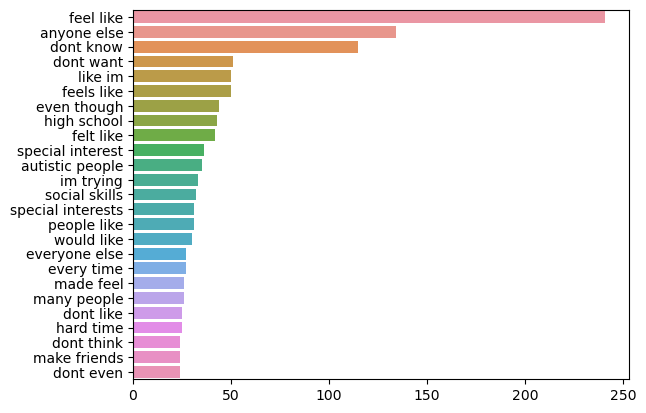

In [78]:
# create barplot of the most common bi-grams in r/aspergers
words, frequency = [], []
for word, count in bigram_asp_list:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x=words, y=frequency);

In [79]:
bigram_gifted_df = get_ngram_freq(2, gifted_df).head(25)

In [80]:
bigram_gifted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 321 to 1235
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   frequency  25 non-null     int64 
 1   ngram      25 non-null     object
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


In [81]:
# drop index column
bigram_gifted_df.reset_index(inplace=True)
bigram_gifted_df.drop(columns = 'index', inplace=True)

In [82]:
# convert dataframe into a list of tuples
bigram_gifted_list = bigram_gifted_df.to_records().tolist()
print(bigram_gifted_list)

[(0, 222, 'feel like'), (1, 131, 'dont know'), (2, 127, 'gifted people'), (3, 83, 'high school'), (4, 82, 'anyone else'), (5, 53, 'even though'), (6, 51, 'iq test'), (7, 50, 'dont want'), (8, 45, 'felt like'), (9, 43, 'year old'), (10, 42, 'would like'), (11, 41, 'mental health'), (12, 40, 'gifted kids'), (13, 39, 'like im'), (14, 38, 'gifted child'), (15, 36, 'feels like'), (16, 35, 'years old'), (17, 35, 'ive always'), (18, 35, 'pretty much'), (19, 33, 'gifted person'), (20, 32, 'things like'), (21, 32, 'dont think'), (22, 30, 'never really'), (23, 29, 'ive never'), (24, 29, 'iq tests')]


In [83]:
# drop the first elements of each tuple in the list
# using list comprehension
# feasible even though tuples are supposed to be immutable
bigram_gifted_list = [el[1:] for el in bigram_gifted_list]

In [84]:
bigram_gifted_list

[(222, 'feel like'),
 (131, 'dont know'),
 (127, 'gifted people'),
 (83, 'high school'),
 (82, 'anyone else'),
 (53, 'even though'),
 (51, 'iq test'),
 (50, 'dont want'),
 (45, 'felt like'),
 (43, 'year old'),
 (42, 'would like'),
 (41, 'mental health'),
 (40, 'gifted kids'),
 (39, 'like im'),
 (38, 'gifted child'),
 (36, 'feels like'),
 (35, 'years old'),
 (35, 'ive always'),
 (35, 'pretty much'),
 (33, 'gifted person'),
 (32, 'things like'),
 (32, 'dont think'),
 (30, 'never really'),
 (29, 'ive never'),
 (29, 'iq tests')]

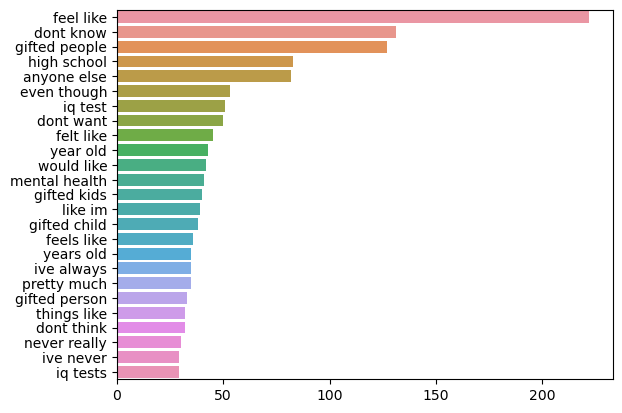

In [85]:
# create barplot of the most common bi-grams in r/gifted
words, frequency = [], []
for word, count in bigram_gifted_list:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x=words, y=frequency);

Most frequent tri-grams by "diagnosis" class.

In [86]:
trigram_asp_df = get_ngram_freq(3, aspergers_df).head(25)

In [87]:
trigram_asp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 7275 to 17861
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   frequency  25 non-null     int64 
 1   ngram      25 non-null     object
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


In [88]:
# drop index column
trigram_asp_df.reset_index(inplace=True)
trigram_asp_df.drop(columns = 'index', inplace=True)

In [89]:
# convert dataframe into a list of tuples
trigram_asp_list = trigram_asp_df.to_records().tolist()
print(trigram_asp_list)

[(0, 24, 'feel like im'), (1, 17, 'anyone else feel'), (2, 12, 'else feel like'), (3, 12, 'makes feel like'), (4, 9, 'dont even know'), (5, 6, 'heres last weeks'), (6, 6, 'week going far'), (7, 6, 'anyone else experience'), (8, 6, 'dont really know'), (9, 5, 'get second opinion'), (10, 5, 'would like know'), (11, 5, 'anyone else similar'), (12, 5, 'feels like im'), (13, 5, 'make new friends'), (14, 5, 'highfunctioning autism aspergers'), (15, 5, 'feel like people'), (16, 5, 'im trying figure'), (17, 5, 'dont know im'), (18, 5, 'people like us'), (19, 5, 'things feel like'), (20, 5, 'dont feel like'), (21, 5, 'high functioning autism'), (22, 5, 'always felt like'), (23, 4, 'like everyone else'), (24, 4, 'mental health issues')]


In [90]:
# drop the first elements of each tuple in the list
# using list comprehension
# feasible even though tuples are supposed to be immutable
trigram_asp_list = [el[1:] for el in trigram_asp_list]

In [91]:
trigram_asp_list

[(24, 'feel like im'),
 (17, 'anyone else feel'),
 (12, 'else feel like'),
 (12, 'makes feel like'),
 (9, 'dont even know'),
 (6, 'heres last weeks'),
 (6, 'week going far'),
 (6, 'anyone else experience'),
 (6, 'dont really know'),
 (5, 'get second opinion'),
 (5, 'would like know'),
 (5, 'anyone else similar'),
 (5, 'feels like im'),
 (5, 'make new friends'),
 (5, 'highfunctioning autism aspergers'),
 (5, 'feel like people'),
 (5, 'im trying figure'),
 (5, 'dont know im'),
 (5, 'people like us'),
 (5, 'things feel like'),
 (5, 'dont feel like'),
 (5, 'high functioning autism'),
 (5, 'always felt like'),
 (4, 'like everyone else'),
 (4, 'mental health issues')]

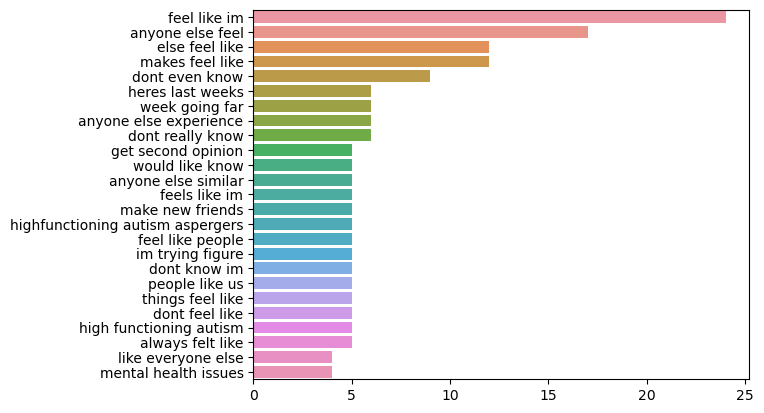

In [92]:
# create barplot of the most common tri-grams in r/gifted
words, frequency = [], []
for word, count in trigram_asp_list:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x=words, y=frequency);

In [93]:
trigram_gifted_df = get_ngram_freq(3, gifted_df).head(25)

In [94]:
trigram_gifted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2481 to 47385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   frequency  25 non-null     int64 
 1   ngram      25 non-null     object
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


In [95]:
# drop index column
trigram_gifted_df.reset_index(inplace=True)
trigram_gifted_df.drop(columns = 'index', inplace=True)

In [96]:
# convert dataframe into a list of tuples
trigram_gifted_list = trigram_gifted_df.to_records().tolist()
print(trigram_gifted_list)

[(0, 15, 'feel like im'), (1, 8, 'long story short'), (2, 8, 'anyone else experience'), (3, 7, 'also feel like'), (4, 7, 'dont feel like'), (5, 7, 'would love hear'), (6, 7, 'else feel like'), (7, 6, 'low self esteem'), (8, 6, 'dont know much'), (9, 6, 'year old son'), (10, 6, 'ive always felt'), (11, 6, 'always felt like'), (12, 6, 'mental health professionals'), (13, 6, 'people feel like'), (14, 6, 'english first language'), (15, 6, 'dont know im'), (16, 6, 'anyone else feel'), (17, 6, 'ive always thought'), (18, 6, 'strong sense justice'), (19, 5, 'like everyone else'), (20, 5, 'anyone else experienced'), (21, 5, 'gifted politics example'), (22, 5, 'feel like ive'), (23, 5, 'often feel like'), (24, 5, 'spatial ability neglected')]


In [97]:
# drop the first elements of each tuple in the list
# using list comprehension
# feasible even though tuples are supposed to be immutable
trigram_gifted_list = [el[1:] for el in trigram_gifted_list]

In [98]:
trigram_gifted_list

[(15, 'feel like im'),
 (8, 'long story short'),
 (8, 'anyone else experience'),
 (7, 'also feel like'),
 (7, 'dont feel like'),
 (7, 'would love hear'),
 (7, 'else feel like'),
 (6, 'low self esteem'),
 (6, 'dont know much'),
 (6, 'year old son'),
 (6, 'ive always felt'),
 (6, 'always felt like'),
 (6, 'mental health professionals'),
 (6, 'people feel like'),
 (6, 'english first language'),
 (6, 'dont know im'),
 (6, 'anyone else feel'),
 (6, 'ive always thought'),
 (6, 'strong sense justice'),
 (5, 'like everyone else'),
 (5, 'anyone else experienced'),
 (5, 'gifted politics example'),
 (5, 'feel like ive'),
 (5, 'often feel like'),
 (5, 'spatial ability neglected')]

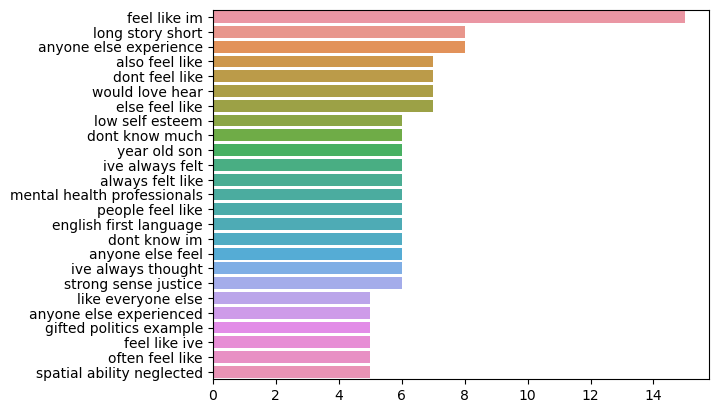

In [99]:
# create barplot of the most common tri-grams in r/gifted
words, frequency = [], []
for word, count in trigram_gifted_list:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x=words, y=frequency);

Create word clouds from preprocessed `aspergers_corpus` and `gifted_corpus`.

In [100]:
# import the necessary libraries after installing wordcloud and pillow
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [101]:
# create a text_document of `corpus` for r/aspergers
wordcloud_asp = ' '

for i in range(len(aspergers_df)):
    wordcloud_asp += ' ' + ' '.join(aspergers_df.corpus[i])

In [102]:
aspergers_df.head(10)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len,text_clean,corpus
0,How's your week going so far? Weekly post #264...,1,558,83,5,1,5.710843,16.800000,hows your week going so far weekly post 264 he...,"[hows, week, going, far, weekly, post, 264, he..."
1,Solitude Project Saturday: What projects are y...,1,620,89,6,1,5.966292,15.000000,solitude project saturday what projects are yo...,"[solitude, project, saturday, projects, workin..."
2,I need to prepare both mentally and physically...,1,1198,243,13,0,3.921811,18.692308,i need to prepare both mentally and physically...,"[need, prepare, mentally, physically, long, ti..."
3,I hate TikTok Autism clout-chasers All these...,1,945,169,6,0,4.585799,28.166667,i hate tiktok autism cloutchasers all these ...,"[hate, tiktok, autism, cloutchasers, people, t..."
4,Anyone have trouble sleeping because of a hype...,1,1165,209,17,0,4.559809,12.294118,anyone have trouble sleeping because of a hype...,"[anyone, trouble, sleeping, hyper, active, bra..."
5,"How would you feel if someone told you, regard...",1,283,49,3,0,4.775510,16.333333,how would you feel if someone told you regardi...,"[would, feel, someone, told, regarding, specia..."
6,Autism is a curse and I hate having something ...,1,38905,7201,226,0,4.397584,31.862832,autism is a curse and i hate having something ...,"[autism, curse, hate, something, ruined, life,..."
7,Why are ADHD and autism often bundled together...,1,660,108,7,0,5.111111,15.428571,why are adhd and autism often bundled together...,"[adhd, autism, often, bundled, together, exclu..."
8,Aspergers and Porn Hi There\n\nI genuinely don...,1,945,178,5,0,4.286517,35.600000,aspergers and porn hi therei genuinely dont kn...,"[aspergers, porn, hi, therei, genuinely, dont,..."
9,How many jobs have we had? I’m 29(m) and sitti...,1,2178,401,24,0,4.396509,16.708333,how many jobs have we had i m 29m and sitting ...,"[many, jobs, 29m, sitting, 44, jobs, ranging, ..."


In [103]:
wordcloud_asp

'  hows week going far weekly post 264 heres last weeks threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions always welcome improve threads post time community wants threads exist take time day every thursday saturday post weekly threads ensure community gets feels needsso continuing theme raspergers week going far solitude project saturday projects working pertain special interests weekly post 264 heres last weeks solitude project saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso raspergers projects go right ideas backburner one reason another ideas planning phase even working someone else still apply mention interest relates project would great may help others need prepare mentally physically long time go casual outing relate time agree go people given lot notice even casual outing seems like nbd people example going friends house dink days stop thinking going wear respond ask question question prep

In [104]:
# import necessary module for customization of wordcloud
from PIL import Image

In [105]:
mask = np.array(Image.open("../images/brainjigsawgraphic_tcm27-97945.png"))

In [106]:
image_colors = ImageColorGenerator(mask)

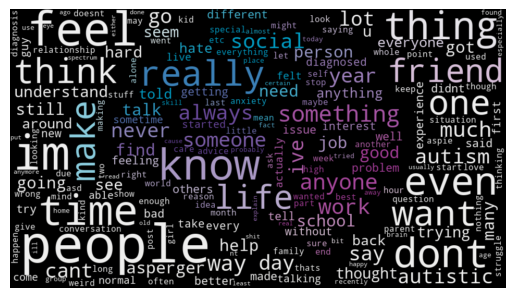

In [107]:
# generate word cloud image for wordcloud_asp
word_cloud = WordCloud(width=3000,
                       height=2000,
                       random_state=1,
                       background_color="black",
                       collocations=False,
                       mask=mask,
                       stopwords=STOPWORDS).generate(wordcloud_asp)
                   

# Display the generated image:
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off");

In [108]:
# store to file
plt.savefig("../images/wordcloud_asp.png", format="png") 
plt.show();

<Figure size 640x480 with 0 Axes>

In [109]:
# create a text_document of `corpus` for r/gifted
wordcloud_gifted = ' '

for i in range(len(gifted_df)):
    wordcloud_gifted += ' ' + ' '.join(gifted_df.corpus[i])

In [110]:
gifted_df.head(10)

,text_feature,diagnosis,char_count,word_count,sen_count,hashtag_count,avg_word_len,avg_sen_len,text_clean,corpus
0,Does your brain automatically synthesize infor...,0,1254,204,11,0,5.142157,18.545455,does your brain automatically synthesize infor...,"[brain, automatically, synthesize, information..."
1,"Parents, what were the early signs that made y...",0,1190,218,13,0,4.417431,16.769231,parents what were the early signs that made yo...,"[parents, early, signs, made, think, child, gi..."
2,Gifted folks who struggled and then succeeded ...,0,1502,255,18,0,4.847059,14.166667,gifted folks who struggled and then succeeded ...,"[gifted, folks, struggled, succeeded, career, ..."
3,What do you guys think about the sub r/iamvery...,0,733,95,4,0,6.726316,23.750000,what do you guys think about the sub riamverys...,"[guys, think, sub, riamverysmart, recently, ca..."
4,Programs similar to Beast Academy for Sciences...,0,585,97,7,0,5.000000,13.857143,programs similar to beast academy for sciences...,"[programs, similar, beast, academy, sciencesla..."
5,"Loneliness Hello, I have been on the internet ...",0,10703,1891,40,0,4.652565,47.275000,loneliness hello i have been on the internet f...,"[loneliness, hello, internet, almost, ten, yea..."
6,How to find folks to work on project together ...,0,519,91,5,1,4.582418,18.200000,how to find folks to work on project together ...,"[find, folks, work, project, together, hix200b..."
7,One of the simplest way to stay happy is to le...,0,89,20,1,0,3.450000,20.000000,one of the simplest way to stay happy is to le...,"[one, simplest, way, stay, happy, let, go, thi..."
8,As scientific methodologies take over the doma...,0,239,32,1,0,6.468750,32.000000,as scientific methodologies take over the doma...,"[scientific, methodologies, take, domain, phil..."
9,"Dear Gifted Children, You DO NOT Owe the World...",0,731,144,7,0,4.076389,20.571429,dear gifted children you do not owe the world ...,"[dear, gifted, children, owe, world, anything,..."


In [111]:
wordcloud_gifted

'  brain automatically synthesize information rather remember details observe regular people interact tend share life experiences storytelling say stuff like day walking grocery store blablabla bunch said said throughout addition commentary felt essentially stay descriptive level seems geared towards social bondingwhen think bulk interactions tend explanatory argumentative level means instead describing every single detail brain tends synthesize whole experience short summary went grocery store nothing ordinary got everything need next 3 days similarly reading books brain skips anything normal predictable focuses parts surprise meotherwise rest interactions getting point across agenda want influence provide arguments explanations support also make stories order convince anecdotes work people think analytically critically parents early signs made think child gifted discovered son turned 2 years 4 months taught read started sight reading shortly turned 2 son always good remembering figur

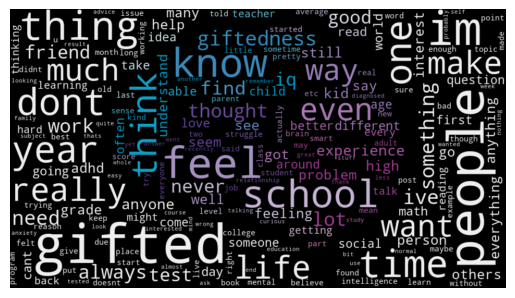

In [112]:
# generate word cloud image for wordcloud_gifted
word_cloud = WordCloud(width=3000,
                       height=2000,
                       random_state=1,
                       background_color="black",
                       collocations=False,
                       mask=mask,
                       stopwords=STOPWORDS).generate(wordcloud_gifted)
                   

# Display the generated image:
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

In [113]:
# store to file
# plt.savefig("../images/wordcloud_gifted.png", format="png") 
# plt.show();

<Figure size 640x480 with 0 Axes>